In [1]:
## https://www.kaggle.com/namanmanchanda/heart-attack-eda-prediction-90-accuracy
## https://www.kaggle.com/prashant111/random-forest-classifier-tutorial
## https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import graphviz
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_csv(r"C:\\Users\\USER\\Desktop\\python_practice\\CVD_ALL.csv",encoding = 'big5')
df = df.dropna()

# Class count
count_class_0, count_class_1 = df['心血管疾病'].value_counts()

# Divide by class
df_class_0 = df[df['心血管疾病'] == 0]
df_class_1 = df[df['心血管疾病'] == 1]

#  由於我們的資料屬於imbalance data
# 使用undersampling 從 non-disease 資料中取出跟 disease者數量相當的樣本
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under['心血管疾病'].value_counts())

Random under-sampling:
1    4944
0    4944
Name: 心血管疾病, dtype: int64


In [5]:
label = df_test_under.columns[2:]
X = df_test_under[label]
y = df_test_under["心血管疾病"]

# 切割訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# 呼叫隨機森林函數
rfc = RandomForestClassifier(random_state=0)

# 利用訓練資料配適模型
rfc.fit(X_train, y_train)

# 配適好後開始用訓練資料預測
y_rfc_pred = rfc.predict(X_test)

In [7]:
rfc.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=209652396)

# visualize the tree
# https://towardsdatascience.com/4-ways-to-visualize-individual-decision-trees-in-a-random-forest-7a9beda1d1b7
# https://graphviz.readthedocs.io/en/stable/manual.html
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

dot_data = export_graphviz(rfc.estimators_[0], 
                           feature_names=label,
                           class_names=['non-disease','disease'], 
                           filled=True, impurity=True, 
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph

graph.format='png'
graph.render('figure_name',view=True)

In [8]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_rfc_pred)))

Model accuracy score with 10 decision-trees : 0.7422


In [9]:
# 調整n_estimator的參數
rfc_100 = RandomForestClassifier(n_estimators=10, random_state=0)

# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)

# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.7093


Confusion matrix

 [[741 263]
 [312 662]]


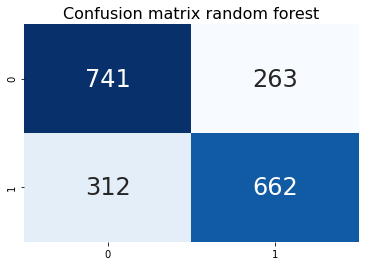

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt # data visualization

cm = confusion_matrix(y_test, y_pred_100)

print('Confusion matrix\n\n', cm)

plt.title('Confusion matrix random forest',fontsize=16)
plt = sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

In [ ]:
# we want to select the most important features to fit the model
# view the feature scores

feature_scores = pd.Series(rfc_100.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

# Visualize the feature importance 

In [ ]:
# Creating a seaborn bar plot
import warnings

warnings.filterwarnings('ignore')
sns.set(font=['sans-serif'])
sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

## 依照較重要的Feature建立模型

In [ ]:
# declare feature vector and target variable

X_new = df_test_under.drop(['ID','檳榔', '家族病史','抽菸','性別','飲酒','抽菸量'], axis=1)

y_new = df_test_under['心血管疾病']


X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 42)

In [ ]:
# instantiate the classifier with n_estimators = 100

clf_feature = RandomForestClassifier(random_state=0)



# fit the model to the training set

clf_feature.fit(X_new_train, y_new_train)


# Predict on the test set results

y_new_pred = clf_feature.predict(X_new_test)



# Check accuracy score 

print('Model accuracy score with some feature variable removed : {0:0.4f}'. format(accuracy_score(y_new_test, y_new_pred)))

In [ ]:
y_new_train.value_counts()

In [ ]:
y_new_test.value_counts()

In [ ]:
X_new_train

In [ ]:
X_new_test

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt # data visualization

cm = confusion_matrix(y_new_test, y_new_pred)

print('Confusion matrix\n\n', cm)

plt.title('Confusion matrix random forest after selecting features',fontsize=16)
plt = sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_new_test, y_new_pred))